<h1>Potential Market Analysis of Istanbul Counties<h1>

<font size="4">**Introduction**</font>

<p>Firs of all I want to talk about a very common example. Most of you might have heard this story. our story is about one of the biggest retail sale chain store Wal-Mart! Wal-Mart management decided to collect and merge the data from customer card system. Wal-Mart management can follow the of the customers: where, when and what they bought recently. With the result of these combinations, it occured that there had been a connection among different products. A part of these connections were predictable. For instance, a customer who buys gin, also buys tonic water and lemon. The result which had been unpredictable was the connection between diaper and beer. Apparently, the male customers who bought diapers on Friday night also were inclined to buy  beer. Nobody foresaw the connection between them and it was an elusive connection to question. After the connection had been seen between diapers and beers, Wal-Mart management decided to move beer section near the diaper section. And of course, the beer sales increased as it was predicted.<p>
    
<p>The first time when I heard this story, it was my first year at Information Systems Engineering. I had no information about Data Science Techniques and Methodology. I eventually understood this field would be a good choice for me. Because, as you can understand from this story I have told above; I may have an opportunity to see the unseen and reveal it.<p>
    
<p>I have been preparing this project in the senior year of my Information Systems Engineering. I have learnt alot of things from a lot of people. However, I am at the bottom of the ladder.<p>
    
<p>If we talk about this project, it has been prepared for the last section Applied Capstone Project of IBM Data Science Proffessional Certificate. This project aims to find this answer: If you decided to open a sea food restaurant in Istanbul where would it be? I will use the detailed explanation in Data Requirements, Data Collection and Data Understanding section  to find the answer of this question. After that, I will create a model with the data and check the results of it.<p>
    
<p>I would like to give the detailed order of my project. Data Scince Methodology is created in 10 steps. I will make a point of following these steps. Here are the steps I will follow;<p>
    
<ol>
  <li>Business Understanding</li>
  <li>Analytic Approach</li>
  <li>Data Requirements</li>
  <li>Data Collection</li>
  <li>Data Understanding</li>
  <li>Data Preperation</li>
  <li>Modeling</li>
  <li>Evaluation</li>
  <li>Deployment</li>
  <li>Feedback</li>
       
</ol> 
    
<br>    
    
**1,2. Business Understanding and Analytic Approach**    

<br>
<p>I have actually explained what kind of thing I will work on. However, it will be better to focus on this section more detailed. Think that you are the owner of the sea food chain restaurant out of Turkey. You serve a lot of countries and cities around the world and its time for you to break into market in Turkey. Most of people know that one of the most crowded cities in Turkey is Istanbul and it is also a worldwide known city in the world. This city is very suitable for breaking into market in Turkey and gaining a better seat in the industry. However,  you don't have any information about the conditions of counties in Istanbul. Of course you have heard about some famous touristic and cultural locations but you can't leave it to chance. That the reason why this situation should be analyzed. If we understand the subject well, it's time for us to focus on the second section.<p>
<br>
**3,4,5. Data Requirements, Data Collection, and Data Understanding**    
<br>
<p>First of all, let's think about what kind of things I need. If you have a restaurant, having a customer should be your first importance. If you haven't break into market of a specific location yet, the number of potential custumer and their average life quality will be one of the important subjects for you. So I will use the most updated 2019 population datas of Istanbul counties. After that I will use the data set which has been created by a research of Istanbul University for the data of potential customers' life quality.This data set shows the index values of life quality according to the counties of Istanbul.<p>

<p>Second of all, another significant informatin is the unit prices of rents. For this, I will use the data set which shows the unit prices of rents according to counties of Istanbul from a real estate website.<p>

<p>Lastly, I will look up numbers of the opponents. For this, I will use Foursquare API. This API provides you to reach venues by categories of the specific location. <p>
<p>So lets first import some libraries:</p>    

In [1]:
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim 
import requests

<p>Now we will collect,read and manipulate data.</p>

In [124]:
#Gettin Istanbul Quality of Life Index Data
dfindex=pd.read_csv('Istanbul_University_Quality_of_Life_Index_Research.csv')
dfindex=dfindex.drop(columns=['Num'])
dfindex['Index']=dfindex['Index'].str.replace(",", '.')
dfindex.head()

,Ilce,Index
0,BEŞİKTAŞ,0.911
1,KADIKÖY,0.886
2,BAKIRKÖY,0.613
3,ŞİŞLİ,0.574
4,FATİH,0.49


In [ ]:
names=dfindex['Ilce'].tolist()
csv_file=open('Istanbul_Lat_Long.csv','w',encoding="utf-8")

In [3]:
CLIENT_ID = '5MWNSXJJ1ZIT5PD1MD5FW4VT14BJ1FVLKJJNHPVXPAM4XUFG' # your Foursquare ID
CLIENT_SECRET = '3ZIUEVACTAU5TCF4TME0CLRUYAI5NNO4AZWHI1J1JWQS2500' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 5MWNSXJJ1ZIT5PD1MD5FW4VT14BJ1FVLKJJNHPVXPAM4XUFG
CLIENT_SECRET:3ZIUEVACTAU5TCF4TME0CLRUYAI5NNO4AZWHI1J1JWQS2500


<p>I use geocoder which is in ```geopy``` package for getting the latitude and longitude of Istanbul Counties.</p>

In [ ]:
for i in range(len(names)):
    address = 'İstanbul'+','+names[i]
    print(names[i])
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    print(latitude,longitude)
    csv_writer.writerow([names[i],latitude,longitude])

In [ ]:
#Open and Write Csv File
csv_writer=csv.writer(csv_file)
csv_writer.writerow(['Ilce','Latitude','Longitude'])

In [4]:
dfloc=pd.read_csv('Istanbul_Lat_Long.csv')
dfloc.head()

,Ilce,Latitude,Longitude
0,BEŞİKTAŞ,41.042847,29.007528
1,KADIKÖY,40.991572,29.027017
2,BAKIRKÖY,40.983541,28.867973
3,ŞİŞLİ,41.061273,28.985020
4,FATİH,41.009633,28.965165


In [5]:
dfcensus=pd.read_csv('Istanbul_Census_2019.csv')
dfcensus.head()

,Ilce,Nüfus 2018,Nüfus 2019,Fark,Nüfus Artışı %,Mah.Say.,Alanı km2,Yoğunluk
0,ADALAR,16.119,15.238,-881.000,"-5,47",5,11,1.385
1,ARNAVUTKÖY,270.549,282.488,11.939,"4,41",38,453,624.000
2,ATAŞEHİR,416.318,425.094,8.776,"2,11",17,25,17.004
3,AVCILAR,435.625,448.882,13.257,"3,04",10,50,8.978
4,BAĞCILAR,734.369,745.125,10.756,"1,46",22,23,32.397


In [6]:
dfcensus=dfcensus.drop(columns=['Nüfus 2018','Fark','Nüfus Artışı %','Mah.Say.','Alanı km2','Yoğunluk'],axis=1)
dfcensus.head()

,Ilce,Nüfus 2019
0,ADALAR,15.238
1,ARNAVUTKÖY,282.488
2,ATAŞEHİR,425.094
3,AVCILAR,448.882
4,BAĞCILAR,745.125


In [7]:
df_rent=pd.read_csv('Istanbul_UnitRentPrice2020.csv')
df_rent.head()

,Ilce,Birim Kira (TL/m2)
0,ADALAR,19
1,BAKIRKÖY,24
2,BEŞİKTAŞ,27
3,BEYKOZ,15
4,BEYOĞLU,27


In [8]:
df_merge1 = pd.merge(dfindex,dfcensus, on='Ilce', how='outer')
df_merge2 = pd.merge(df_merge1,df_rent , on='Ilce' , how='outer')
df_counties=pd.merge(df_merge2,dfloc, on='Ilce', how='outer')
df_counties.head()


,Ilce,Index,Nüfus 2019,Birim Kira (TL/m2),Latitude,Longitude
0,BEŞİKTAŞ,0.911,182.649,27,41.042847,29.007528
1,KADIKÖY,0.886,482.713,20,40.991572,29.027017
2,BAKIRKÖY,0.613,229.239,24,40.983541,28.867973
3,ŞİŞLİ,0.574,279.817,22,41.061273,28.985020
4,FATİH,0.49,443.090,18,41.009633,28.965165


<p>Let's rename our some columns for the next steps.</p>

In [9]:
df_counties=df_counties.rename(columns={"Ilce":"Neighborhood","Nüfus 2019":"Population","Birim Kira (TL/m2)":"Unit Rent(TL/m2)"})
df_counties.head()

,Neighborhood,Index,Population,Unit Rent(TL/m2),Latitude,Longitude
0,BEŞİKTAŞ,0.911,182.649,27,41.042847,29.007528
1,KADIKÖY,0.886,482.713,20,40.991572,29.027017
2,BAKIRKÖY,0.613,229.239,24,40.983541,28.867973
3,ŞİŞLİ,0.574,279.817,22,41.061273,28.985020
4,FATİH,0.49,443.090,18,41.009633,28.965165


<p>Before visualization I want to look data types of columns.</p>

In [10]:
df_counties.dtypes

Neighborhood         object
Index                object
Population          float64
Unit Rent(TL/m2)      int64
Latitude            float64
Longitude           float64
dtype: object

<p>As we can see above all column data types are true except ```Index``` and ```Unit Rent(TL/m2)```. Index and Unit Rent(TL/m2) should be ```float64```.</p>

In [11]:
df_counties['Index']=df_counties['Index'].astype(float)
df_counties['Unit Rent(TL/m2)']=df_counties['Unit Rent(TL/m2)'].astype(float)
df_counties.dtypes

Neighborhood         object
Index               float64
Population          float64
Unit Rent(TL/m2)    float64
Latitude            float64
Longitude           float64
dtype: object

<font size='4'>**Visualize Geocode data of Istanbul Counties**</font>

<p>Now visualize our counties centers in a map by using ```folium``` package.</p>

In [12]:
import folium
latitude=41.0082
longitude=28.9784
map_Istanbul = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng,neighborhood,population in zip(df_counties['Latitude'], df_counties['Longitude'],df_counties['Neighborhood'],df_counties['Population']):
    label = '{}, {}'.format(neighborhood, population)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Istanbul)  
    
map_Istanbul

**In this report, we will be using Foursquare as another source of data.**

**We will find the numbers of open restourants and open sea food restourants in conties of Istanbul.**

In [20]:

LIMIT = 10000
Radius = 10000

def getNearbyVenues(names, latitudes, longitudes, radius=10000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng,
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng,
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue',          
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [41]:
#Let's call all the new information available to a new dataset.
Istanbul_venues = getNearbyVenues(names=df_counties['Neighborhood'],
                                   latitudes=df_counties['Latitude'],
                                   longitudes=df_counties['Longitude']
                                  )

BEŞİKTAŞ
KADIKÖY
BAKIRKÖY
ŞİŞLİ
FATİH
BEYOĞLU
ÜSKÜDAR
SARIYER
EYÜP
MALTEPE
KARTAL
KÜÇÜKÇEKMECE
BAYRAMPAŞA
BÜYÜKÇEKMECE
BAHÇELİEVLER
ATAŞEHİR
PENDİK
ZEYTİNBURNU
BEYLİKDÜZÜ
BEYKOZ
TUZLA
KAĞITHANE
ÜMRANİYE
GÜNGÖREN
ADALAR
BAŞAKŞEHİR
AVCILAR
BAĞCILAR
ESENYURT
ÇATALCA
ÇEKMEKÖY
SİLİVRİ
GAZİOSMANPAŞA
SANCAKTEPE
ESENLER
SULTANGAZİ
ŞİLE
SULTANBEYLİ
ARNAVUTKÖY


In [42]:
#Let's see how many rows and columns we have in our new dataset.
Istanbul_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,BEŞİKTAŞ,41.042847,29.007528,Four Seasons Hotel Bosphorus,41.042101,29.012102,Hotel
1,BEŞİKTAŞ,41.042847,29.007528,Terrace Cafe At Four Season,41.042168,29.012391,Café
2,BEŞİKTAŞ,41.042847,29.007528,Conrad İstanbul Executive Lounge,41.047035,29.008963,Roof Deck
3,BEŞİKTAŞ,41.042847,29.007528,Beşiktaş Kahvesi Hookah Lounge,41.044550,29.001968,Hookah Bar
4,BEŞİKTAŞ,41.042847,29.007528,Şairler Parkı,41.042328,29.000285,Park


In [43]:
Istanbul_venues.shape

(3900, 7)

In [44]:
#Group our data frame based on Neighborhood and count columns.
Istanbul_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
ADALAR,100,100,100,100,100,100
ARNAVUTKÖY,100,100,100,100,100,100
ATAŞEHİR,100,100,100,100,100,100
AVCILAR,100,100,100,100,100,100
BAHÇELİEVLER,100,100,100,100,100,100
BAKIRKÖY,100,100,100,100,100,100
BAYRAMPAŞA,100,100,100,100,100,100
BAĞCILAR,100,100,100,100,100,100
BAŞAKŞEHİR,100,100,100,100,100,100


In [45]:
#Let's see how many unique venue categories we have.
print("There are {} unique venue categories in our data frame.".format(len(Istanbul_venues['Venue Category'].unique())))

There are 263 unique venue categories in our data frame.


In [46]:
# One hot encoding: we turn categorical values in to zeros and ones to better accomodate Machine Learning algorithms.
Istanbul_onehot = pd.get_dummies(Istanbul_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Istanbul_onehot['Neighborhood'] = Istanbul_venues['Neighborhood'] 
Istanbul_onehot.set_index('Neighborhood', inplace = True)
Istanbul_onehot.reset_index(inplace=True)
Istanbul_onehot.head()

,Neighborhood,Accessories Store,Airport,Airport Food Court,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Aquarium,Arcade,...,Veterinarian,Video Store,Volleyball Court,Waterfront,Wedding Hall,Wine Bar,Wings Joint,Women's Store,Yemeni Restaurant,Yoga Studio
0,BEŞİKTAŞ,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,BEŞİKTAŞ,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,BEŞİKTAŞ,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,BEŞİKTAŞ,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,BEŞİKTAŞ,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
#Calculating frequencies of each category appearing in each neighbourhood.
Istanbul_grouped = Istanbul_onehot.groupby('Neighborhood').mean().reset_index()
Istanbul_grouped

,Neighborhood,Accessories Store,Airport,Airport Food Court,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Aquarium,Arcade,...,Veterinarian,Video Store,Volleyball Court,Waterfront,Wedding Hall,Wine Bar,Wings Joint,Women's Store,Yemeni Restaurant,Yoga Studio
0,ADALAR,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,...,0.00,0.00,0.01,0.01,0.00,0.00,0.01,0.00,0.00,0.00
1,ARNAVUTKÖY,0.00,0.00,0.00,0.02,0.01,0.01,0.00,0.00,0.03,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,ATAŞEHİR,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.01,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00
3,AVCILAR,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,...,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.00
4,BAHÇELİEVLER,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.00,...,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.01
5,BAKIRKÖY,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.00,...,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00
6,BAYRAMPAŞA,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,...,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00
7,BAĞCILAR,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.01,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01
8,BAŞAKŞEHİR,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01
9,BEYKOZ,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.09,0.00,0.00,0.01,0.01,0.00,0.01


In [49]:
#Scaling down categories to columns that include word "Restaurant"
Istanbul_restaurants_grouped = Istanbul_grouped.loc[:, Istanbul_grouped.columns.str.contains('Restaurant')]
Istanbul_restaurants_grouped.head()

,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant,Fast Food Restaurant,French Restaurant,Gluten-free Restaurant,...,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Restaurant,Seafood Restaurant,Sushi Restaurant,Turkish Home Cooking Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Yemeni Restaurant
0,0.00,0.0,0.0,0.00,0.0,0.0,0.01,0.00,0.00,0.01,...,0.01,0.00,0.00,0.06,0.04,0.0,0.00,0.02,0.0,0.0
1,0.01,0.0,0.0,0.00,0.0,0.0,0.00,0.01,0.00,0.00,...,0.00,0.00,0.00,0.07,0.00,0.0,0.01,0.06,0.0,0.0
2,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.01,0.00,0.00,...,0.00,0.01,0.00,0.05,0.03,0.0,0.00,0.02,0.0,0.0
3,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.02,0.04,0.0,0.00,0.03,0.0,0.0
4,0.00,0.0,0.0,0.01,0.0,0.0,0.00,0.00,0.01,0.00,...,0.00,0.00,0.01,0.03,0.03,0.0,0.00,0.04,0.0,0.0


In [50]:
#Adding back Neighborhood column and resetting index so that we can manipulate its data.
Istanbul_restaurants_grouped['Neighborhood'] = Istanbul_grouped['Neighborhood'] 
Istanbul_restaurants_grouped.set_index('Neighborhood', inplace = True)
Istanbul_restaurants_grouped.reset_index(inplace=True)
Istanbul_restaurants_grouped.head()

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Neighborhood,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant,Fast Food Restaurant,French Restaurant,...,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Restaurant,Seafood Restaurant,Sushi Restaurant,Turkish Home Cooking Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Yemeni Restaurant
0,ADALAR,0.00,0.0,0.0,0.00,0.0,0.0,0.01,0.00,0.00,...,0.01,0.00,0.00,0.06,0.04,0.0,0.00,0.02,0.0,0.0
1,ARNAVUTKÖY,0.01,0.0,0.0,0.00,0.0,0.0,0.00,0.01,0.00,...,0.00,0.00,0.00,0.07,0.00,0.0,0.01,0.06,0.0,0.0
2,ATAŞEHİR,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.01,0.00,...,0.00,0.01,0.00,0.05,0.03,0.0,0.00,0.02,0.0,0.0
3,AVCILAR,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,...,0.00,0.00,0.00,0.02,0.04,0.0,0.00,0.03,0.0,0.0
4,BAHÇELİEVLER,0.00,0.0,0.0,0.01,0.0,0.0,0.00,0.00,0.01,...,0.00,0.00,0.01,0.03,0.03,0.0,0.00,0.04,0.0,0.0


<p>Now let's find the percentage of sea food restaurants among other restaurant categories.</p>

In [51]:
#Summing up all the rows first.
Istanbul_restaurants_grouped['Sum'] = Istanbul_restaurants_grouped.sum(axis=1)
Istanbul_restaurants_grouped.head()

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Neighborhood,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant,Fast Food Restaurant,French Restaurant,...,Modern European Restaurant,Molecular Gastronomy Restaurant,Restaurant,Seafood Restaurant,Sushi Restaurant,Turkish Home Cooking Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Yemeni Restaurant,Sum
0,ADALAR,0.00,0.0,0.0,0.00,0.0,0.0,0.01,0.00,0.00,...,0.00,0.00,0.06,0.04,0.0,0.00,0.02,0.0,0.0,0.15
1,ARNAVUTKÖY,0.01,0.0,0.0,0.00,0.0,0.0,0.00,0.01,0.00,...,0.00,0.00,0.07,0.00,0.0,0.01,0.06,0.0,0.0,0.17
2,ATAŞEHİR,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.01,0.00,...,0.01,0.00,0.05,0.03,0.0,0.00,0.02,0.0,0.0,0.13
3,AVCILAR,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,...,0.00,0.00,0.02,0.04,0.0,0.00,0.03,0.0,0.0,0.11
4,BAHÇELİEVLER,0.00,0.0,0.0,0.01,0.0,0.0,0.00,0.00,0.01,...,0.00,0.01,0.03,0.03,0.0,0.00,0.04,0.0,0.0,0.14


In [59]:
#Finding the ratios of fast food restaurants by dividing the frequency of row sums by fast food restaurant restaurant frequencies of each row.
Istanbul_restaurants_grouped['Ratio'] = Istanbul_restaurants_grouped.loc[:,"Seafood Restaurant"].div(Istanbul_restaurants_grouped['Sum'], axis=0)
Istanbul_restaurants_grouped.head()

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Neighborhood,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant,Fast Food Restaurant,French Restaurant,...,Molecular Gastronomy Restaurant,Restaurant,Seafood Restaurant,Sushi Restaurant,Turkish Home Cooking Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Yemeni Restaurant,Sum,Ratio
0,ADALAR,0.00,0.0,0.0,0.00,0.0,0.0,0.01,0.00,0.00,...,0.00,0.06,0.04,0.0,0.00,0.02,0.0,0.0,0.15,0.266667
1,ARNAVUTKÖY,0.01,0.0,0.0,0.00,0.0,0.0,0.00,0.01,0.00,...,0.00,0.07,0.00,0.0,0.01,0.06,0.0,0.0,0.17,0.000000
2,ATAŞEHİR,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.01,0.00,...,0.00,0.05,0.03,0.0,0.00,0.02,0.0,0.0,0.13,0.230769
3,AVCILAR,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,...,0.00,0.02,0.04,0.0,0.00,0.03,0.0,0.0,0.11,0.363636
4,BAHÇELİEVLER,0.00,0.0,0.0,0.01,0.0,0.0,0.00,0.00,0.01,...,0.01,0.03,0.03,0.0,0.00,0.04,0.0,0.0,0.14,0.214286


In [60]:
#Filling not available values with zeros, so that we don't have any problems while calling top restaurant categories from Foursquare API.
Istanbul_restaurants_grouped['Ratio'] = Istanbul_restaurants_grouped['Ratio'].fillna(0)
Istanbul_restaurants_grouped.head()

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Neighborhood,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant,Fast Food Restaurant,French Restaurant,...,Molecular Gastronomy Restaurant,Restaurant,Seafood Restaurant,Sushi Restaurant,Turkish Home Cooking Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Yemeni Restaurant,Sum,Ratio
0,ADALAR,0.00,0.0,0.0,0.00,0.0,0.0,0.01,0.00,0.00,...,0.00,0.06,0.04,0.0,0.00,0.02,0.0,0.0,0.15,0.266667
1,ARNAVUTKÖY,0.01,0.0,0.0,0.00,0.0,0.0,0.00,0.01,0.00,...,0.00,0.07,0.00,0.0,0.01,0.06,0.0,0.0,0.17,0.000000
2,ATAŞEHİR,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.01,0.00,...,0.00,0.05,0.03,0.0,0.00,0.02,0.0,0.0,0.13,0.230769
3,AVCILAR,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,...,0.00,0.02,0.04,0.0,0.00,0.03,0.0,0.0,0.11,0.363636
4,BAHÇELİEVLER,0.00,0.0,0.0,0.01,0.0,0.0,0.00,0.00,0.01,...,0.01,0.03,0.03,0.0,0.00,0.04,0.0,0.0,0.14,0.214286


<p>Visualize Ratio based on counties.<p>

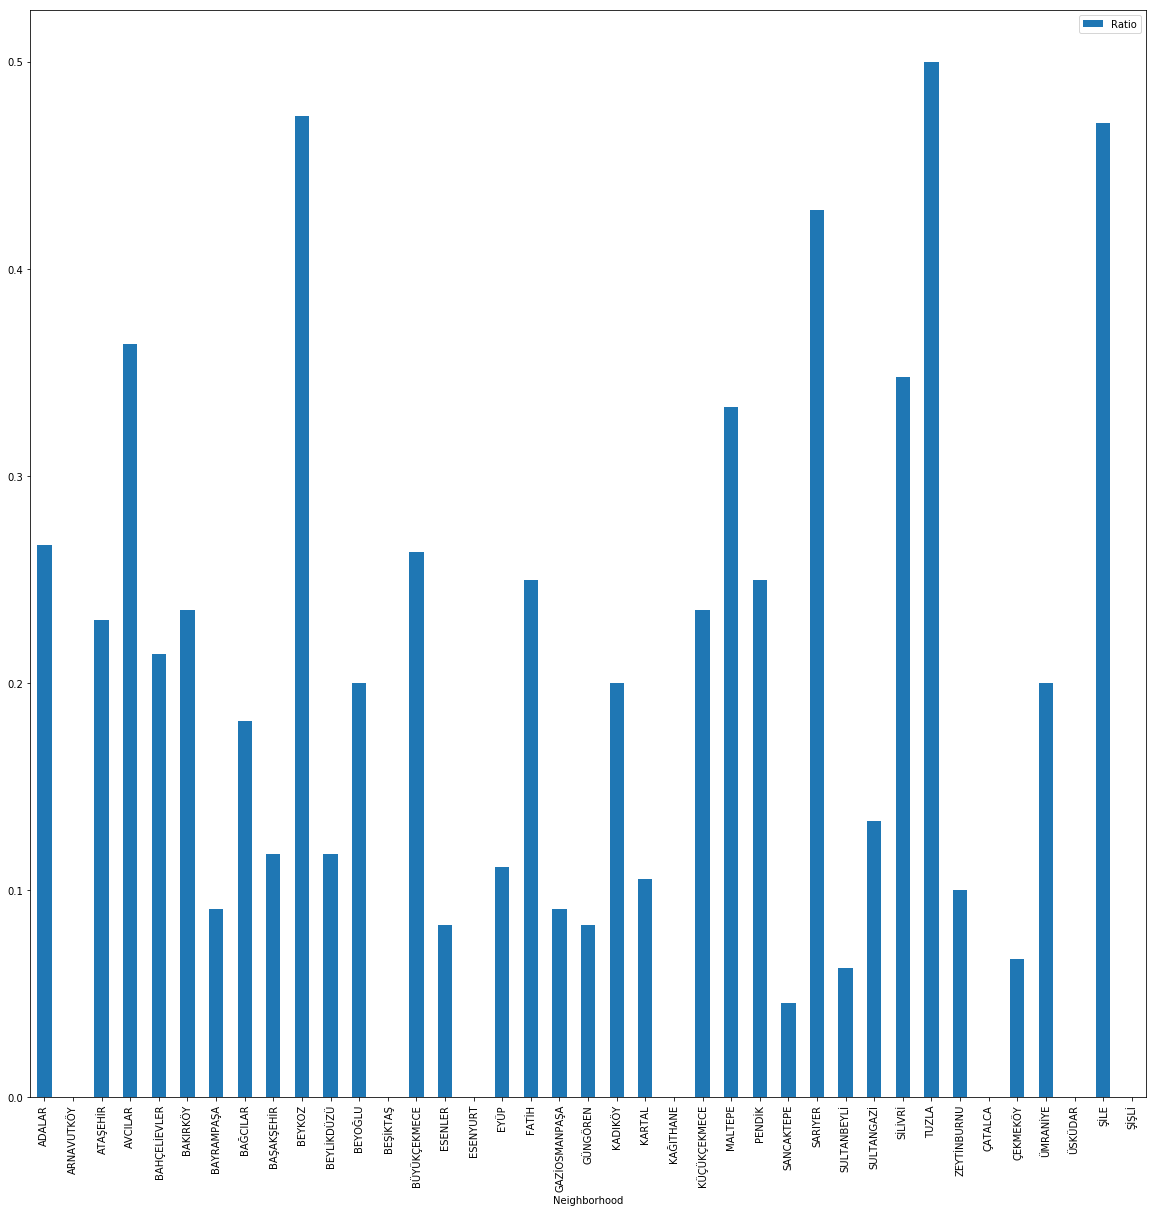

In [63]:
ax = Istanbul_restaurants_grouped.plot.bar(x='Neighborhood', y='Ratio', rot=90,figsize=(20,20))
ax

<p>Now as we can see above, ratio is very changeable based on counties. We will look the relationship between ratio and other variables in further steps such as Index,Population etc. which are in our dataset .

In [64]:
# Dropping Sum and Ratio columns so that they don't appear inside the restaurant categories we call.
Istanbul_restaurants_grouped_na = Istanbul_restaurants_grouped.drop(['Sum','Ratio'], axis=1)
Istanbul_restaurants_grouped_na.head()

,Neighborhood,American Restaurant,Asian Restaurant,Bosnian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant,Fast Food Restaurant,French Restaurant,...,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Restaurant,Seafood Restaurant,Sushi Restaurant,Turkish Home Cooking Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Yemeni Restaurant
0,ADALAR,0.00,0.0,0.0,0.00,0.0,0.0,0.01,0.00,0.00,...,0.01,0.00,0.00,0.06,0.04,0.0,0.00,0.02,0.0,0.0
1,ARNAVUTKÖY,0.01,0.0,0.0,0.00,0.0,0.0,0.00,0.01,0.00,...,0.00,0.00,0.00,0.07,0.00,0.0,0.01,0.06,0.0,0.0
2,ATAŞEHİR,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.01,0.00,...,0.00,0.01,0.00,0.05,0.03,0.0,0.00,0.02,0.0,0.0
3,AVCILAR,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,...,0.00,0.00,0.00,0.02,0.04,0.0,0.00,0.03,0.0,0.0
4,BAHÇELİEVLER,0.00,0.0,0.0,0.01,0.0,0.0,0.00,0.00,0.01,...,0.00,0.00,0.01,0.03,0.03,0.0,0.00,0.04,0.0,0.0


<font size='4'>**6. Data Preparation**</font>

<p>Before we start, let's look what we did until this section.First we get Index,Population,Unit Rent and location data of Istanbul counties. For further steps we did some manipulations on these data sets when we were importing.After getting these data sets we plotted center locations of Istanbul counties. Then we recieved restourants in counties of Istanbul by using Foursquare API and count them by filtering venues named Restourant and Sea Food Restourant.After counting them we found the percentage of sea food restaurants among other restaurant categories.</p>
<p>Now we will concatenate datasets.This dataset will be our main dataset.</p>

In [65]:
#To avoid confusion, I make a new dataset that includes Neighborhood and Ratio columns. 
Igp = Istanbul_restaurants_grouped[['Neighborhood','Ratio']]
Igp.head()

,Neighborhood,Ratio
0,ADALAR,0.266667
1,ARNAVUTKÖY,0.000000
2,ATAŞEHİR,0.230769
3,AVCILAR,0.363636
4,BAHÇELİEVLER,0.214286


In [66]:
#Then join with df_couinties.
df_fnll = pd.merge(Igp, df_counties, on='Neighborhood')
df_fnll.head()

,Neighborhood,Ratio,Index,Population,Unit Rent(TL/m2),Latitude,Longitude
0,ADALAR,0.266667,-0.142,15.238,19.0,40.876259,29.091027
1,ARNAVUTKÖY,0.000000,-0.620,282.488,8.0,41.186400,28.738900
2,ATAŞEHİR,0.230769,0.046,425.094,16.0,40.984749,29.106720
3,AVCILAR,0.363636,-0.161,448.882,12.0,40.980135,28.717547
4,BAHÇELİEVLER,0.214286,0.053,611.059,14.0,40.997700,28.850600


In [67]:
#To totally rinse the dataframe from Non-Fast Food Related items, I drop out all the 0 values under Ratio column.
df_fnll = df_fnll[df_fnll.Ratio != 0]
df_fnll.head()

,Neighborhood,Ratio,Index,Population,Unit Rent(TL/m2),Latitude,Longitude
0,ADALAR,0.266667,-0.142,15.238,19.0,40.876259,29.091027
2,ATAŞEHİR,0.230769,0.046,425.094,16.0,40.984749,29.106720
3,AVCILAR,0.363636,-0.161,448.882,12.0,40.980135,28.717547
4,BAHÇELİEVLER,0.214286,0.053,611.059,14.0,40.997700,28.850600
5,BAKIRKÖY,0.235294,0.613,229.239,24.0,40.983541,28.867973


In [68]:
df_fnll

,Neighborhood,Ratio,Index,Population,Unit Rent(TL/m2),Latitude,Longitude
0,ADALAR,0.266667,-0.142,15.238,19.0,40.876259,29.091027
2,ATAŞEHİR,0.230769,0.046,425.094,16.0,40.984749,29.106720
3,AVCILAR,0.363636,-0.161,448.882,12.0,40.980135,28.717547
4,BAHÇELİEVLER,0.214286,0.053,611.059,14.0,40.997700,28.850600
5,BAKIRKÖY,0.235294,0.613,229.239,24.0,40.983541,28.867973
6,BAYRAMPAŞA,0.090909,0.093,274.735,14.0,41.034900,28.912200
7,BAĞCILAR,0.181818,-0.190,745.125,12.0,41.033899,28.857898
8,BAŞAKŞEHİR,0.117647,-0.152,460.259,15.0,41.097693,28.806163
9,BEYKOZ,0.473684,0.025,248.260,15.0,41.123935,29.108315
10,BEYLİKDÜZÜ,0.117647,0.025,352.412,12.0,41.001079,28.642054


In [69]:
#Let's turn frequency ratio to percentage.
df_fnll['Percentage']=df_fnll['Ratio']*100
df_fnll.head()

,Neighborhood,Ratio,Index,Population,Unit Rent(TL/m2),Latitude,Longitude,Percentage
0,ADALAR,0.266667,-0.142,15.238,19.0,40.876259,29.091027,26.666667
2,ATAŞEHİR,0.230769,0.046,425.094,16.0,40.984749,29.106720,23.076923
3,AVCILAR,0.363636,-0.161,448.882,12.0,40.980135,28.717547,36.363636
4,BAHÇELİEVLER,0.214286,0.053,611.059,14.0,40.997700,28.850600,21.428571
5,BAKIRKÖY,0.235294,0.613,229.239,24.0,40.983541,28.867973,23.529412


In [70]:
#Putting Unit Rent,Index,Population and Percentage to the end of the table.
df_fnll=df_fnll[['Neighborhood','Latitude','Longitude','Index','Population','Unit Rent(TL/m2)','Percentage']]
df_fnll.head()

,Neighborhood,Latitude,Longitude,Index,Population,Unit Rent(TL/m2),Percentage
0,ADALAR,40.876259,29.091027,-0.142,15.238,19.0,26.666667
2,ATAŞEHİR,40.984749,29.106720,0.046,425.094,16.0,23.076923
3,AVCILAR,40.980135,28.717547,-0.161,448.882,12.0,36.363636
4,BAHÇELİEVLER,40.997700,28.850600,0.053,611.059,14.0,21.428571
5,BAKIRKÖY,40.983541,28.867973,0.613,229.239,24.0,23.529412


<font size='4'>**7. Modeling**</font>

<p>My hypothesis was I could catch the regression between Index,Population,Unit Rent and Pertentage of sea food restourants.Looking at the scatter plots on below there is no linear relation between Percentage and the other variables.Also we can't use regression because our data is not marked.That shows we can't use supervised learning methods.We need to use unsupervised learning methods.With a little search I learned the best model for my case was a K-Means method.K-Means method is one of the best and common clustering method for unsupervised learning.Now let's start Modeling section.</p>

In [72]:
#Changing space in Unit Rent with an underscore so that the scatter plot doesn't confuse our code.
df_fnll = df_fnll.rename(columns={'Unit Rent(TL/m2)':'Unit_Rent'})

In [73]:
#importing matplot libraries to visualize the data.
import matplotlib
import matplotlib.pyplot as plt

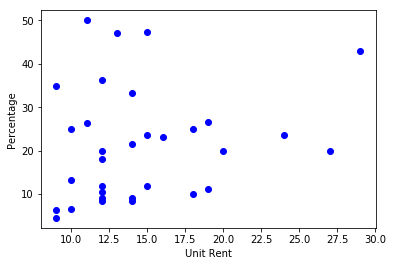

In [74]:
#First let's look relation between Unit Rent and Percentage
plt.scatter(df_fnll.Unit_Rent, df_fnll.Percentage, color='blue')
plt.xlabel("Unit Rent")
plt.ylabel("Percentage")
plt.show()

<p>As we can see above,the relationship between Unit Rent and Percentage is non-linear.So keep looking relationship between other columns.</p>

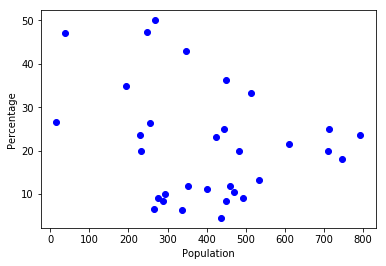

In [75]:
#First let's look relation between population and Percentage
plt.scatter(df_fnll.Population, df_fnll.Percentage, color='blue')
plt.xlabel("Population")
plt.ylabel("Percentage")
plt.show()

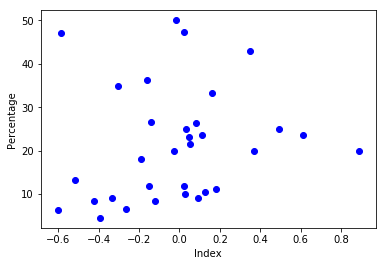

In [76]:
#First let's look relation between Index and Percentage
plt.scatter(df_fnll.Index, df_fnll.Percentage, color='blue')
plt.xlabel("Index")
plt.ylabel("Percentage")
plt.show()

<p>It seems there is no linear relation between the number of sea food restaurants,Index,Population and Unit rent in Istanbul.<p>

**So now we will try to use an unsupervised Machine Learning algorithm called K-Means clustering to put all the data into 5 different clusters**

<p>Firs import ```KMeans``` package from ```sklearn```.</p>

In [78]:
from sklearn.cluster import KMeans

In [79]:
# set number of clusters
kclusters = 5

df_fnll_clustering = df_fnll.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_fnll_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 0, 0, 3, 2, 2, 3, 0, 2, 4])

<p>Now I will add clusters to my dataframe.<p>

In [80]:
# add clustering labels
df_fnll.insert(0, 'Cluster Labels', kmeans.labels_)
df_fnll.head() # check the last columns!

,Cluster Labels,Neighborhood,Latitude,Longitude,Index,Population,Unit_Rent,Percentage
0,1,ADALAR,40.876259,29.091027,-0.142,15.238,19.0,26.666667
2,0,ATAŞEHİR,40.984749,29.106720,0.046,425.094,16.0,23.076923
3,0,AVCILAR,40.980135,28.717547,-0.161,448.882,12.0,36.363636
4,3,BAHÇELİEVLER,40.997700,28.850600,0.053,611.059,14.0,21.428571
5,2,BAKIRKÖY,40.983541,28.867973,0.613,229.239,24.0,23.529412


<p>Let's visualize the clustered data frame on map.</p>

In [83]:
#import some packages
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors


In [84]:

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_fnll['Latitude'], df_fnll['Longitude'], df_fnll['Neighborhood'], df_fnll['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<br>
<p>**Until now the clustring is over .So now I will look  clusters.**</p>

<font size='3'>**Cluster_0**</font>

In [85]:
cluster_0 = df_fnll.loc[df_fnll['Cluster Labels'] == 0, df_fnll.columns[[1,4] + list(range(5, df_fnll.shape[1]))]]
cluster_0 = cluster_0.sort_values(by=['Index'], ascending=False)
cluster_0

,Neighborhood,Index,Population,Unit_Rent,Percentage
20,KADIKÖY,0.886,482.713,20.0,20.000000
17,FATİH,0.490,443.090,18.0,25.000000
24,MALTEPE,0.161,513.316,14.0,33.333333
21,KARTAL,0.128,470.676,12.0,10.526316
2,ATAŞEHİR,0.046,425.094,16.0,23.076923
8,BAŞAKŞEHİR,-0.152,460.259,15.0,11.764706
3,AVCILAR,-0.161,448.882,12.0,36.363636
18,GAZİOSMANPAŞA,-0.333,491.962,12.0,9.090909
26,SANCAKTEPE,-0.391,436.733,9.0,4.545455
14,ESENLER,-0.421,450.344,12.0,8.333333


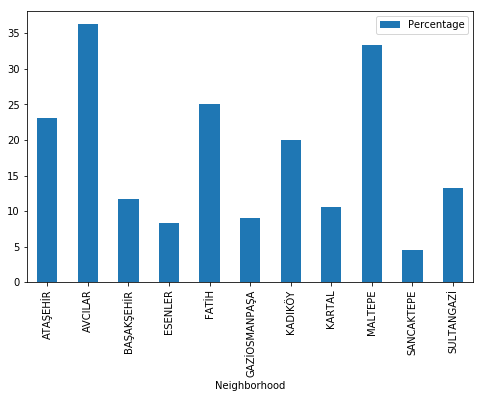

In [86]:
cluster_0 = df_fnll.loc[df_fnll['Cluster Labels'] == 0, df_fnll.columns[[1,4] + list(range(5, df_fnll.shape[1]))]]
cluster_00 = cluster_0[['Neighborhood','Percentage']]
cluster_00.set_index('Neighborhood', inplace=True)
cluster_00.plot(kind='bar', figsize=(8, 5))

In [114]:
print('Mean of Percentege Cluster_0: {}'.format(cluster_0['Percentage'].mean()))
print('Mean of Population Cluster_0: {}'.format(cluster_0['Population'].mean()))
print('Mean of Index Cluster_0: {}'.format(cluster_0['Index'].mean()))
print('Mean of Unit Rent Cluster_0: {}'.format(cluster_0['Unit_Rent'].mean()))

Mean of Percentege Cluster_0: 17.760722249886335
Mean of Population Cluster_0: 468.8758181818182
Mean of Index Cluster_0: -0.024090909090909083
Mean of Unit Rent Cluster_0: 13.636363636363637


<font size='3'>**Cluster_1**</font>

In [88]:
cluster_1 = df_fnll.loc[df_fnll['Cluster Labels'] == 1, df_fnll.columns[[1,4] + list(range(5, df_fnll.shape[1]))]]
cluster_1 = cluster_1.sort_values(by=['Index'], ascending=False)
cluster_1

,Neighborhood,Index,Population,Unit_Rent,Percentage
0,ADALAR,-0.142,15.238,19.0,26.666667
37,ŞİLE,-0.587,37.692,13.0,47.058824


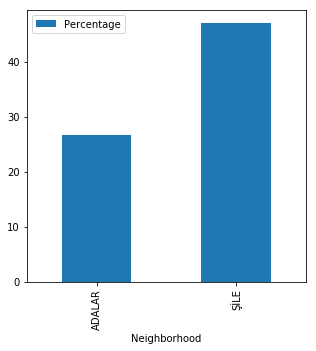

In [91]:
clus_1_plot=cluster_1.plot.bar(x='Neighborhood',y='Percentage',rot=90,figsize=(5,5))

In [115]:
print('Mean of Percentege Cluster_1: {}'.format(cluster_1['Percentage'].mean()))
print('Mean of Population Cluster_1: {}'.format(cluster_1['Population'].mean()))
print('Mean of Index Cluster_1: {}'.format(cluster_1['Index'].mean()))
print('Mean of Unit Rent Cluster_1: {}'.format(cluster_1['Unit_Rent'].mean()))

Mean of Percentege Cluster_1: 36.86274509803921
Mean of Population Cluster_1: 26.465
Mean of Index Cluster_1: -0.3645
Mean of Unit Rent Cluster_1: 16.0


<font size='3'>**Cluster_2**</font>

In [93]:
cluster_2 = df_fnll.loc[df_fnll['Cluster Labels'] == 2, df_fnll.columns[[1,4] + list(range(5, df_fnll.shape[1]))]]
cluster_2 = cluster_2.sort_values(by=['Index'], ascending=False)
cluster_2

,Neighborhood,Index,Population,Unit_Rent,Percentage
5,BAKIRKÖY,0.613,229.239,24.0,23.529412
11,BEYOĞLU,0.367,233.323,27.0,20.000000
6,BAYRAMPAŞA,0.093,274.735,14.0,9.090909
13,BÜYÜKÇEKMECE,0.081,254.103,11.0,26.315789
32,ZEYTİNBURNU,0.027,293.574,18.0,10.000000
9,BEYKOZ,0.025,248.260,15.0,47.368421
31,TUZLA,-0.018,267.400,11.0,50.000000
19,GÜNGÖREN,-0.119,289.441,14.0,8.333333
34,ÇEKMEKÖY,-0.264,264.508,10.0,6.666667
30,SİLİVRİ,-0.304,193.680,9.0,34.782609


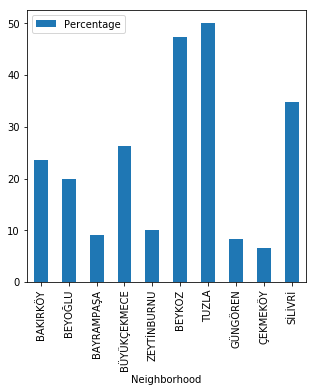

In [96]:
clus_2_plot=cluster_2.plot.bar(x='Neighborhood',y='Percentage',rot=90,figsize=(5,5))

In [112]:
print('Mean of Percentege Cluster_2: {}'.format(cluster_2['Percentage'].mean()))
print('Mean of Population Cluster_2: {}'.format(cluster_2['Population'].mean()))
print('Mean of Index Cluster_2: {}'.format(cluster_2['Index'].mean()))
print('Mean of Unit Rent Cluster_2: {}'.format(cluster_2['Unit_Rent'].mean()))

Mean of Percentege Cluster_2: 23.608714007758294
Mean of Population Cluster_2: 254.82629999999995
Mean of Index Cluster_2: 0.050099999999999964
Mean of Unit Rent Cluster_2: 15.3


<font size='3'>**Cluster_3**</font>

In [97]:
cluster_3 = df_fnll.loc[df_fnll['Cluster Labels'] == 3, df_fnll.columns[[1,4] + list(range(5, df_fnll.shape[1]))]]
cluster_3 = cluster_3.sort_values(by=['Index'], ascending=False)
cluster_3

,Neighborhood,Index,Population,Unit_Rent,Percentage
23,KÜÇÜKÇEKMECE,0.114,792.821,15.0,23.529412
4,BAHÇELİEVLER,0.053,611.059,14.0,21.428571
25,PENDİK,0.032,711.894,10.0,25.000000
35,ÜMRANİYE,-0.028,710.280,12.0,20.000000
7,BAĞCILAR,-0.190,745.125,12.0,18.181818


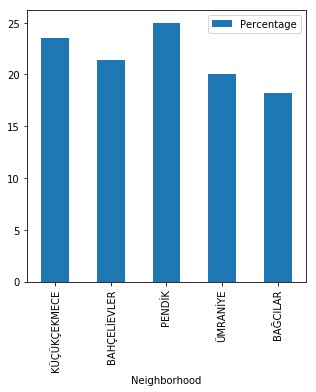

In [98]:
clus_3_plot=cluster_3.plot.bar(x='Neighborhood',y='Percentage',rot=90,figsize=(5,5))

In [113]:
print('Mean of Percentege Cluster_3: {}'.format(cluster_3['Percentage'].mean()))
print('Mean of Population Cluster_3: {}'.format(cluster_3['Population'].mean()))
print('Mean of Index Cluster_3: {}'.format(cluster_3['Index'].mean()))
print('Mean of Unit Rent Cluster_3: {}'.format(cluster_3['Unit_Rent'].mean()))

Mean of Percentege Cluster_3: 21.6279602750191
Mean of Population Cluster_3: 714.2358
Mean of Index Cluster_3: -0.003799999999999998
Mean of Unit Rent Cluster_3: 12.6


<font size='3'>**Cluster_4**</font>

In [100]:
cluster_4=df_fnll.loc[df_fnll['Cluster Labels']==4]
cluster_4

,Cluster Labels,Neighborhood,Latitude,Longitude,Index,Population,Unit_Rent,Percentage
10,4,BEYLİKDÜZÜ,41.001079,28.642054,0.025,352.412,12.0,11.764706
16,4,EYÜP,41.046044,28.925324,0.183,400.513,19.0,11.111111
27,4,SARIYER,41.170603,29.054363,0.347,347.214,29.0,42.857143
28,4,SULTANBEYLİ,40.968087,29.258789,-0.601,336.021,9.0,6.250000


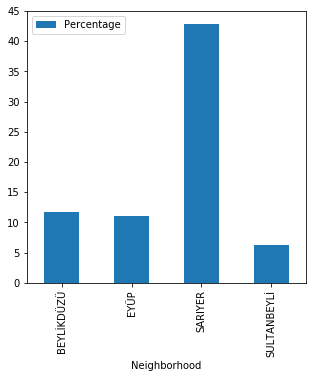

In [101]:
cluster_4_plot=cluster_4.plot.bar(x='Neighborhood',y='Percentage',rot=90,figsize=(5,5))

In [116]:
print('Mean of Percentege Cluster_4: {}'.format(cluster_4['Percentage'].mean()))
print('Mean of Population Cluster_4: {}'.format(cluster_4['Population'].mean()))
print('Mean of Index Cluster_4: {}'.format(cluster_4['Index'].mean()))
print('Mean of Unit Rent Cluster_4: {}'.format(cluster_4['Unit_Rent'].mean()))

Mean of Percentege Cluster_4: 17.995739962651726
Mean of Population Cluster_4: 359.03999999999996
Mean of Index Cluster_4: -0.01150000000000001
Mean of Unit Rent Cluster_4: 17.25


Now we will a bit different visualization technique. Let's start!

In [117]:
import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe


In [118]:
Ist_geo = r'Istanbul.json' # geojson file

In [122]:
# create map
Ist_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
# generate choropleth map using the percentage of Fast Food Restaurants over to other Restaurants in LA.
Ist_clusters.choropleth(
    geo_data=Ist_geo,
    data=df_fnll,
    columns=['Neighborhood','Percentage'],
    key_on='feature.properties.NAME_2',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Sea Food Restaurant Ratio')
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_fnll['Latitude'], df_fnll['Longitude'], df_fnll['Neighborhood'], df_fnll['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(Ist_clusters)

# display map
Ist_clusters

<br>
<font size='4'>**8. Evaluation and Final Report**</font>

**Analysis of Clusters**
<br>
<p>Before we start,let's decide what the decisive factor is for us.If you are about to enter the market and your goal is to provide quality service, it would be important for you to have a good quality of life in the district where you will open the restaurant.So the Index will be the most decisive factor for you.
<p>Cluster_0:In this cluster there are two counties that stand out according to the Index:Kadıköy and Fatih.Kadıköy has 0.886 Index number, 482.713 Pupolation, 20.0 Turkish Liras Unit Rent Price and 20% Sea Food Restaurant ratios over other restaurants respectively.Fatih has 0.490 Index number, 443.090 Population, 18.0 Turkish Liras Unit Rent Price and 25% Sea Food Restaurant ratios over other restaurants respectively.</p>
<p>Cluster_1:In this cluster we have only two counties.That counties are Adalar and Şile.Adalar has -0.142 Index number, 15.238 Population, 19.0 Turkish Liras Unit Rent Price and 26% Sea Food Restaurant ratios over other restaurants respectively.As for Şile,it has -0.587 Index number, 37.692 Population, 13.0 Turkish Liras Unit Rent Price and 47% Sea Food Restaurant ratios over other restaurants respectively.</p>
<p>Cluster_2:In this cluster there are two counties that stand out according to the Index:Bakırköy and Beyoğlu.Bakırköy has 0.613 Index number, 229.238 Population, 24.0 Turkish Liras Unit Rent Price and 23% Sea Food Restaurant ratios over other restaurants respectively.Beyoğlu has 0.367 Index number, 233.323 Population 27.0 Turkish Liras Unit Rent Price and 20% Sea Food Restaurant ratios over other restaurants respectively.</p>
<p>Cluster_3:In this cluster there is one county that stands out according to the Index:Küçükçekmece.Küçükçekmece has 0.114 Index number, 792.821 Population, 15.0 Turkish Liras Unit Rent Price and 23% Sea Food Restaurant ratios over other restaurants respectively.</p> 
<p>Cluster_4:In this cluster there are two counties that stand out according to the Index:Sarıyer and Eyüp.Sarıyer has 0.347 Index Number, 347.214 Population, 29.0 Turkish Liras Unit Rent Price and 42% Sea Food Restaurant ratios over other restaurants respectively.Eyüp has 0.183 Index number, 400.513 Population, 29.0 Turkish Liras Unit Rent Price and 11% Sea Food Restaurant ratios over other restaurants respectively.</p>
<br>
**Final Thoughts**
<br>
<p>To have a better visual image of what’s going on, I plotted a choropleth map using ```Folium``` library of Python to see the big picture.A short glance at the map shows us that Sea Food/Other Restaurants ratio vary from 4% to 50%. With the help of map and clusters, it can be said that the most remarkable options are Bakırköy from cluster_2 and Kadıköy from cluster_0.But if we go deeper, we can see there is some major difference between these two counties.Firs, Kadıköy has greater Index Number and  Population.However Bakırköy has 3% more sea food restaurant percentage than Kadıköy and Unit Rent Price is 4.0 Turkish Liras more.But for percentage we should not forget the restaurants that are not in Foursquare.Secon is the causes of non-mathematical effects.These effects are transportation,trustic venues, intensity of cultural and artstic activities.Of these three factors, trustic venues, cultural and artistic activities stand out for Kadikoy.But transportation is equal for both.Because they have access to both Kadıköy and Bakırköy metro lines,bus lines,ferry lines and metrobus lines.
<p>All in all the map above, clusters and information give a good idea on where to start the search in terms of sea food culture and comparative population, quality of life index and Unit Rent Price.</p>   